In [1]:
from google.colab import auth
auth.authenticate_user()

from google.colab import drive
drive.mount('/content/drive', force_remount=False)

Mounted at /content/drive


In [4]:
import os
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

In [5]:
folder = "dacon"
project_dir = "korea_east_west_power"

base_path = Path("/content/drive/My Drive/")
project_path = base_path / folder / project_dir
os.chdir(project_path)

for x in list(project_path.glob("*")):
    if x.is_dir():
        dir_name = str(x.relative_to(project_path))
        os.rename(dir_name, dir_name.split(" ", 1)[0])

print(f"현재 디렉토리 위치: {os.getcwd()}")

현재 디렉토리 위치: /content/drive/My Drive/dacon/korea_east_west_power


In [34]:
energy_df = pd.read_csv('./data/energy.csv')

In [35]:
def to_datetime(date_str):
    if date_str[11:13] != '24':
        return pd.to_datetime(date_str, format='%Y-%m-%d %H:%M:%S')

    date_str = date_str[0:11] + '00' + date_str[13:]
    
    return pd.to_datetime(date_str, format='%Y%m%d %H:%M:%S') + \
           dt.timedelta(days=1)

def set_date_info(df, column_name):
    df['year'] = df[column_name].dt.year
    df['month'] = df[column_name].dt.month
    df['day'] = df[column_name].dt.day
    df['dayofweek'] = df[column_name].dt.dayofweek
    df['quarter'] = df[column_name].dt.quarter
    df['hour'] = df[column_name].dt.hour
    df['minute'] = df[column_name].dt.minute
    df['second'] = df[column_name].dt.second
    df['weekend'] = df['dayofweek'].apply(lambda x: int(x in [5, 6]))

    return df

def draw_line_plot(df, x, y, hue = ''):
    fig, axes = plt.subplots(len(y), 1)
    fig.set_size_inches(10, 15)

    for i in range(0, len(y)):
        if hue:
            sns.lineplot(x = x, y = y[i], hue = hue, data = df, ax = axes[i])
        else:
            sns.lineplot(x = x, y = y[i], data = df, ax = axes[i])
    
    plt.show()

## energy.csv - 발전소별 발전량
- time : 1시간 단위 계량된 시간 (ex-2018-03-01 1:00:00 => 2018-03-01 00:00:00 ~ 2018-03-01 1:00:00 1시간동안 발전량 계량)
- dangjin_floating : 당진수상태양광 발전량(KW)
- dangjin_warehouse : 당진자재창고태양광 발전량(KW)
- dangjin : 당진태양광 발전량(KW)
- ulsan : 울산태양광 발전량(KW)

In [36]:
energy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25632 entries, 0 to 25631
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   time               25632 non-null  object 
 1   dangjin_floating   25608 non-null  float64
 2   dangjin_warehouse  25584 non-null  float64
 3   dangjin            25632 non-null  int64  
 4   ulsan              25632 non-null  int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 1001.4+ KB


In [37]:
energy_df.isnull().sum()

time                  0
dangjin_floating     24
dangjin_warehouse    48
dangjin               0
ulsan                 0
dtype: int64

In [38]:
energy_df['time'] = energy_df.time.apply(to_datetime)
# energy_df['start_time'] = pd.to_datetime(energy_df['end_time']) - pd.Timedelta(hours = 1)
energy_df = energy_df[['time', 'dangjin_floating', 'dangjin_warehouse', 'dangjin', 'ulsan']]
energy_df = set_date_info(energy_df, 'time')[['time', 'year', 'month', 'day', 'dayofweek','weekend', 'quarter', 'hour', 'minute', 'second', 'dangjin_floating', 'dangjin_warehouse', 'dangjin', 'ulsan']]

In [39]:
energy_df

,time,year,month,day,dayofweek,weekend,quarter,hour,minute,second,dangjin_floating,dangjin_warehouse,dangjin,ulsan
0,2018-03-01 01:00:00,2018,3,1,3,0,1,1,0,0,0.0,0.0,0,0
1,2018-03-01 02:00:00,2018,3,1,3,0,1,2,0,0,0.0,0.0,0,0
2,2018-03-01 03:00:00,2018,3,1,3,0,1,3,0,0,0.0,0.0,0,0
3,2018-03-01 04:00:00,2018,3,1,3,0,1,4,0,0,0.0,0.0,0,0
4,2018-03-01 05:00:00,2018,3,1,3,0,1,5,0,0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25627,2021-01-31 20:00:00,2021,1,31,6,1,1,20,0,0,0.0,0.0,0,0
25628,2021-01-31 21:00:00,2021,1,31,6,1,1,21,0,0,0.0,0.0,0,0
25629,2021-01-31 22:00:00,2021,1,31,6,1,1,22,0,0,0.0,0.0,0,0
25630,2021-01-31 23:00:00,2021,1,31,6,1,1,23,0,0,0.0,0.0,0,0


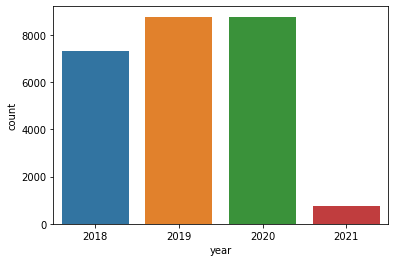

In [40]:
# 년도별 count
sns.countplot(x='year', data=energy_df)

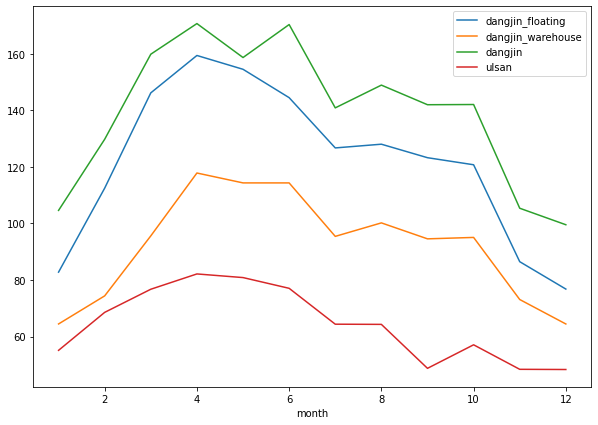

In [41]:
# 월별 발전량 평균
energy_df.groupby('month')[['dangjin_floating', 'dangjin_warehouse', 'dangjin', 'ulsan']].mean().plot(kind='line', figsize=(10,7))

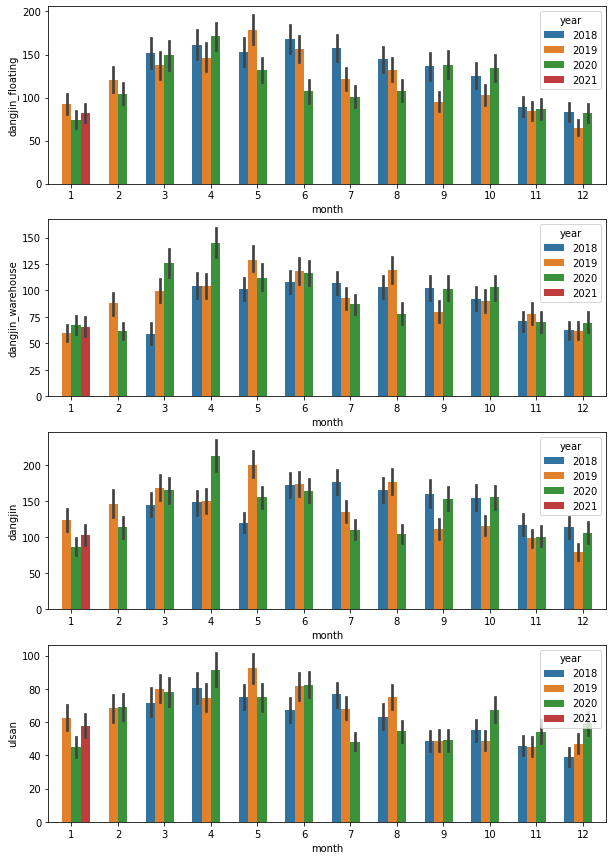

In [42]:
# 년도별/월별 발전량(KW)
fig, axes = plt.subplots(4, 1)
fig.set_size_inches(10, 15)
sns.barplot(x='month', y='dangjin_floating', hue = 'year', data=energy_df, ax=axes[0])  # 당진수상태양광 발전량(KW)
sns.barplot(x='month', y='dangjin_warehouse', hue = 'year', data=energy_df, ax=axes[1]) # 당진자재창고태양광 발전량(KW)
sns.barplot(x='month', y='dangjin', hue = 'year', data=energy_df, ax=axes[2])           # 당진태양광 발전량(KW)
sns.barplot(x='month', y='ulsan', hue = 'year', data=energy_df, ax=axes[3])             # 울산태양광 발전량(KW)
plt.show()

In [43]:
# 분기별 데이터 분포
energy_df['quarter'].value_counts()

4    6624
3    6624
2    6552
1    5832
Name: quarter, dtype: int64

In [44]:
# 분기별 데이터 분포
energy_df['hour'].value_counts()

15    1068
14    1068
16    1068
1     1068
17    1068
2     1068
18    1068
3     1068
19    1068
4     1068
20    1068
5     1068
21    1068
6     1068
22    1068
7     1068
23    1068
8     1068
9     1068
10    1068
11    1068
12    1068
13    1068
0     1068
Name: hour, dtype: int64

In [45]:
energy_df['minute'].value_counts()

0    25632
Name: minute, dtype: int64

In [46]:
energy_df['second'].value_counts()

0    25632
Name: second, dtype: int64

In [27]:
energy_df = energy_df.drop(['minute', 'second'], axis=1)

,time,year,month,day,dayofweek,quarter,hour,dangjin_floating,dangjin_warehouse,dangjin,ulsan
0,2018-03-01 01:00:00,2018,3,1,3,1,1,0.0,0.0,0,0
1,2018-03-01 02:00:00,2018,3,1,3,1,2,0.0,0.0,0,0
2,2018-03-01 03:00:00,2018,3,1,3,1,3,0.0,0.0,0,0
3,2018-03-01 04:00:00,2018,3,1,3,1,4,0.0,0.0,0,0
4,2018-03-01 05:00:00,2018,3,1,3,1,5,0.0,0.0,0,0


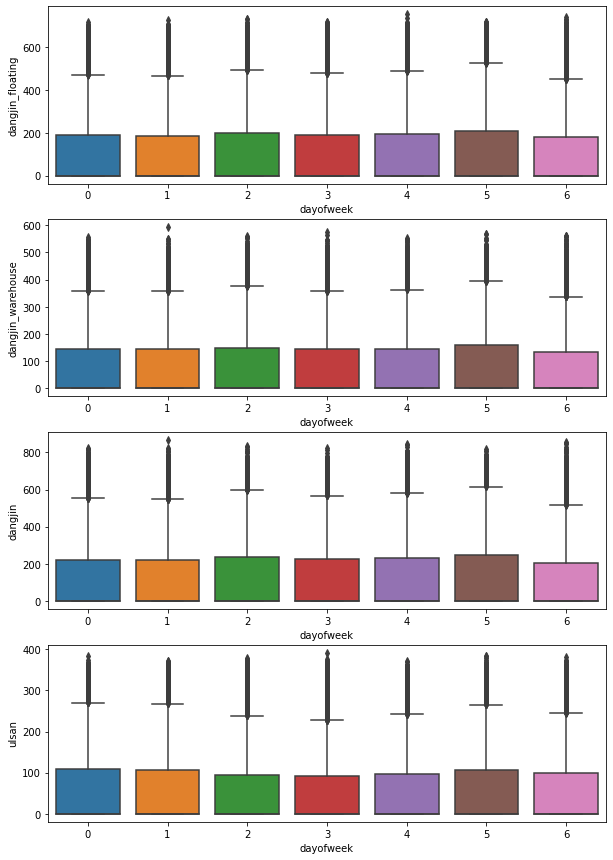

In [47]:
# 요일별 발전량(KW)

fig, axes = plt.subplots(4, 1)
fig.set_size_inches(10, 15)
sns.boxplot(x='dayofweek', y='dangjin_floating', data=energy_df, ax=axes[0])  # 당진수상태양광 발전량(KW)
sns.boxplot(x='dayofweek', y='dangjin_warehouse', data=energy_df, ax=axes[1]) # 당진자재창고태양광 발전량(KW)
sns.boxplot(x='dayofweek', y='dangjin', data=energy_df, ax=axes[2])           # 당진태양광 발전량(KW)
sns.boxplot(x='dayofweek', y='ulsan', data=energy_df, ax=axes[3])             # 울산태양광 발전량(KW)
plt.show()

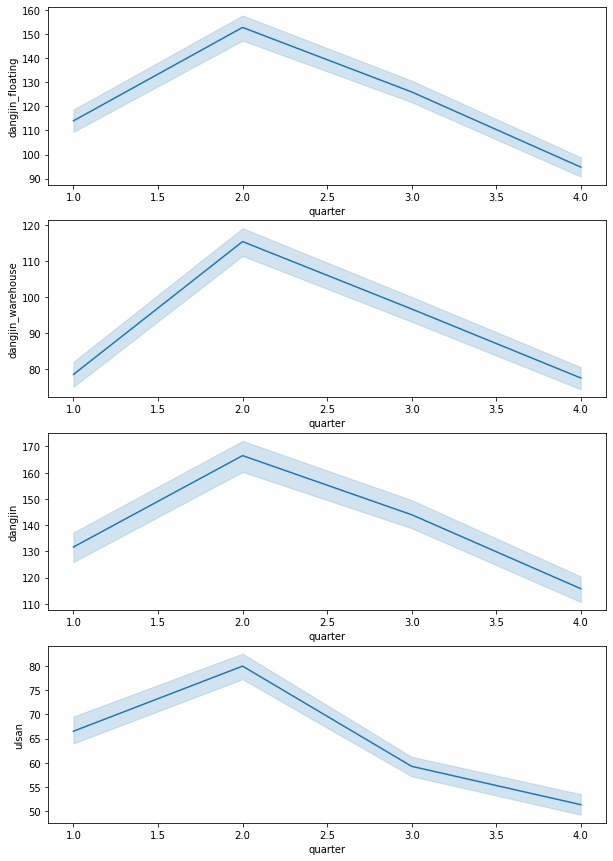

In [48]:
# 분기별 발전량
power_generations = ['dangjin_floating', 'dangjin_warehouse', 'dangjin', 'ulsan']
draw_line_plot(energy_df, 'quarter', power_generations)

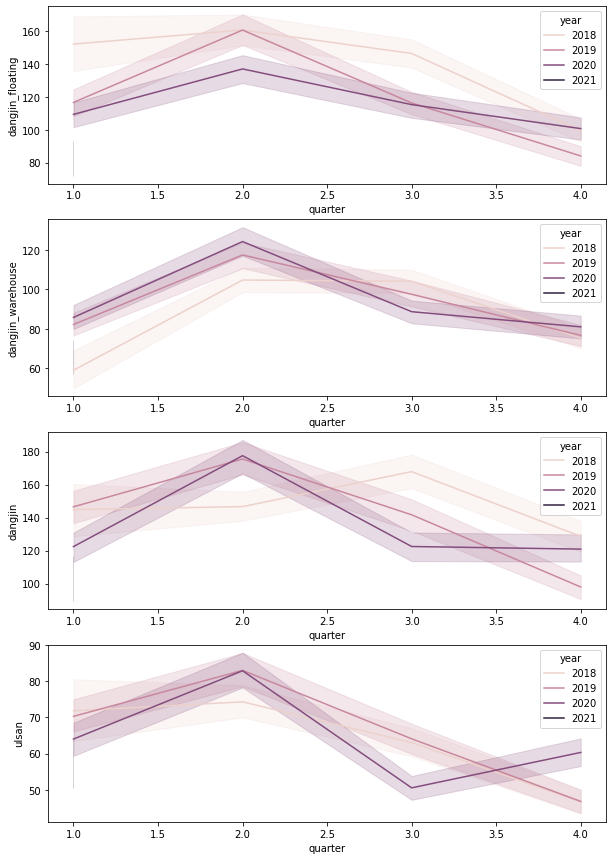

In [49]:
# 년도별/분기별 발전량
draw_line_plot(energy_df, 'quarter', power_generations, 'year')

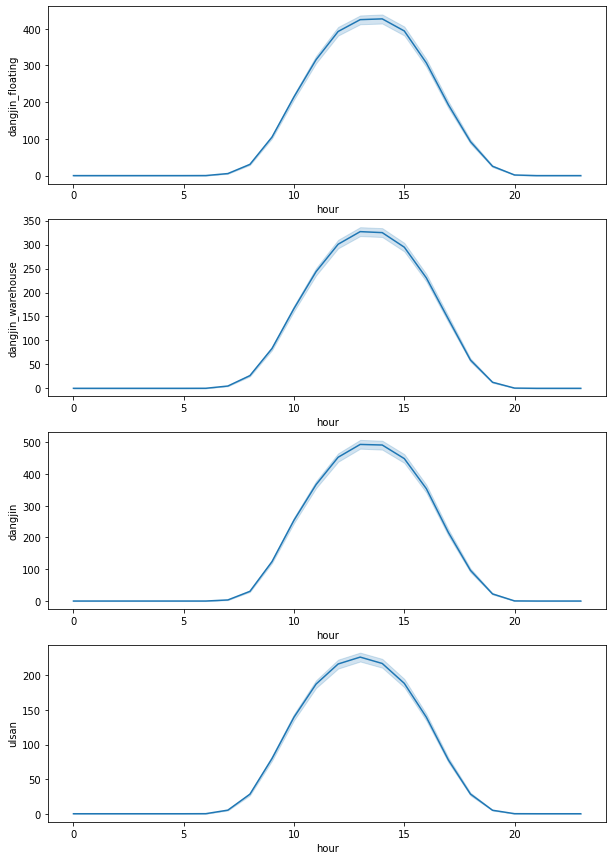

In [50]:
# 시간별 발전량
draw_line_plot(energy_df, 'hour', power_generations)

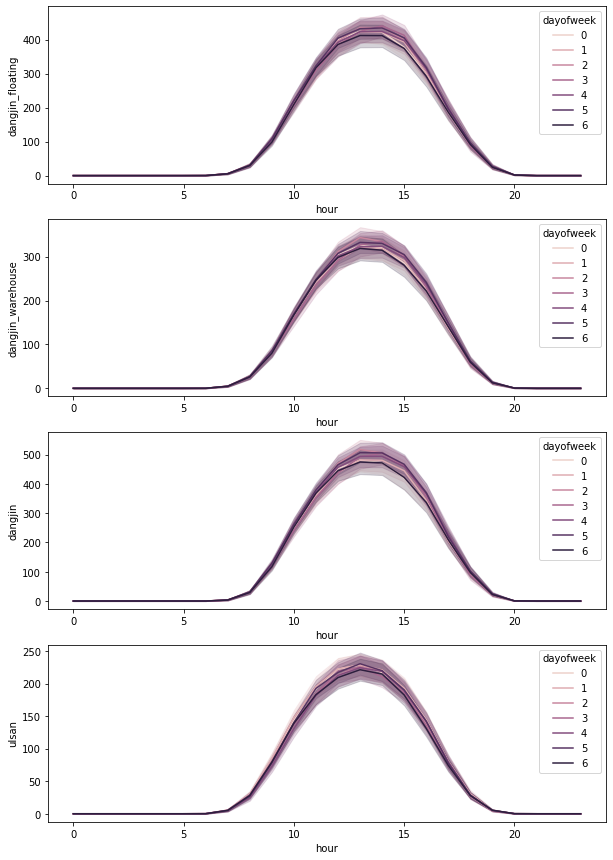

In [51]:
# 요일별/시간별 발전량
draw_line_plot(energy_df, 'hour', power_generations, hue = 'dayofweek')

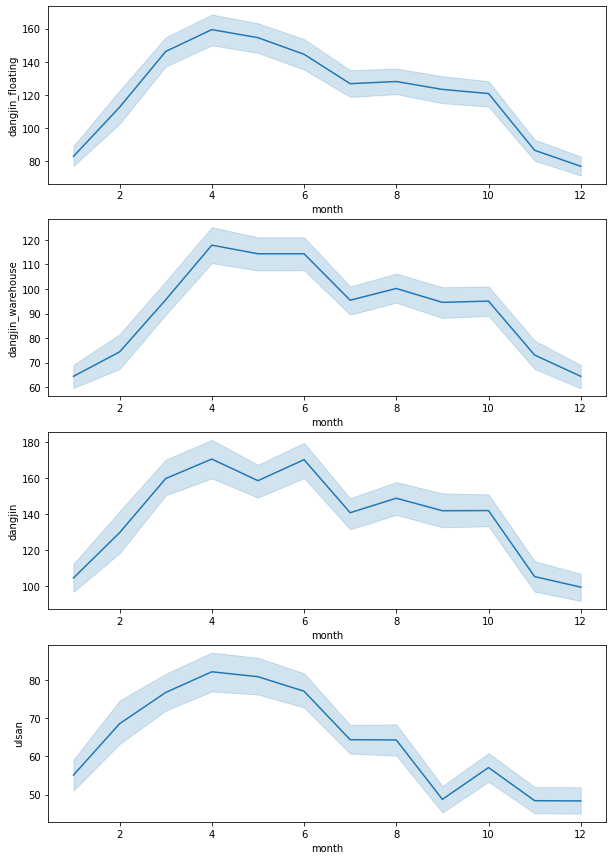

In [52]:
# 월별 발전량
draw_line_plot(energy_df, 'month', power_generations)

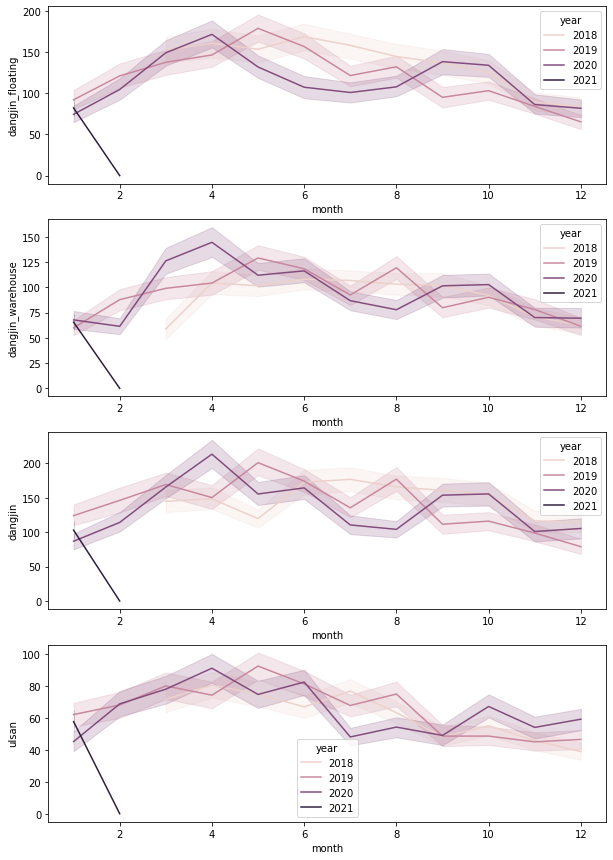

In [53]:
# 월별/년도별 발전량
draw_line_plot(energy_df, 'month', power_generations, 'year')